# Identifying experiments and sessions of interest using the data manifest

This Jupyter notebook illustrates what data is available as part of the <b>Visual Behavior - 2P dataset</b>, and helps you to understand the experimental design and conditions. The notebook will demonstrate how to identify experiments and sessions that you may be interested in analyzing using the data manifests provided by the `VisualBehaviorOphysProjectCache`, by exploring the metadata columns that describe the dimensions of the dataset including transgenic lines, targeted areas, imaging depths, microscopes that were used, session types, and variants of the dataset. 

In [1]:
# import necessary packages
import numpy as np
import pandas as pd

import allensdk
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

## First, load the project cache - your access point for all tables and datasets

In [2]:
# Update this to a valid directory in your filesystem
data_storage_directory = r"\Data\visual_behavior_ophys_cache_dir"

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

The data manifest is comprised of three types of tables: 

1. `behavior_session_table` 
2. `ophys_session_table` 
3. `ophys_experiment_table` 

The `behavior_session_table` contains metadata for every <b>behavior session</b> in the dataset. Some behavior sessions have 2-photon data associated with them, while others took place during training in the behavior facility. The different training stages that mice are progressed through are described by the `session_type`. 

The `ophys_session_table` contains metadata for every 2-photon imaging (aka optical physiology, or ophys) session in the dataset, associated with a unique `ophys_session_id`. An <b>ophys session</b> is one continuous recording session under the microscope, and can contain different numbers of imaging planes (aka experiments) depending on which microscope was used. For Scientifica sessions, there will only be one experiment (aka imaging plane) per session. For Multiscope sessions, there can be up to eight imaging planes per session. Quality Control (QC) is performed on each individual imaging plane within a session, so each can fail QC independent of the others. This means that a Multiscope session may not have exactly eight experiments (imaging planes). 

The `ophys_experiment_table` contains metadata for every <b>ophys experiment</b> in the dataset, which corresponds to a single imaging plane recorded in a single session, and associated with a unique `ophys_experiment_id`. A key part of our experimental design is targeting a given population of neurons, contained in one imaging plane, across multiple `session_types` (further described below) to examine the impact of varying sensory and behavioral conditions on single cell responses. The collection of all imaging sessions for a given imaging plane is referred to as an <b>ophys container</b>, associated with a unique `ophys_container_id`. Each ophys container may contain different numbers of sessions, depending on which experiments passed QC, and how many retakes occured (when a given `session_type` fails QC on the first try, an attempt is made to re-acquire the session_type on a different recording day - this is called a retake). 

### To understand the difference between an `ophys_experiment`, an `ophys_session`, and an `ophys_container`, the following schematic can be helpful

### insert data_structure_terminology.png

## Lets go through each table and examine what metadata columns are available

# Behavior Sessions Table

In [3]:
behavior_sessions = cache.get_behavior_session_table()

print(f"Total number of behavior sessions: {len(behavior_sessions)}")

behavior_sessions.head()

Total number of behavior sessions: 3572


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,file_id
behavior_session_id,,,,,,,,,,,,,,,,,,,,
870987812,BEH.D-Box1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,80.0,TRAINING_0_gratings_autorewards_15min,Sst-IRES-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-05-17 14:46:33.550,1.085368e+09
872953842,BEH.D-Box1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,84.0,TRAINING_1_gratings,Sst-IRES-Cre,GCaMP6f,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2019-05-21 13:22:20.613,1.085368e+09
873774125,BEH.D-Box1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,85.0,TRAINING_1_gratings,Sst-IRES-Cre,GCaMP6f,NaN,1,NaN,0,NaN,NaN,NaN,NaN,2019-05-22 13:19:52.005,1.085368e+09
874790261,BEH.D-Box1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,86.0,TRAINING_1_gratings,Sst-IRES-Cre,GCaMP6f,NaN,2,NaN,0,NaN,NaN,NaN,NaN,2019-05-23 13:40:31.405,1.085368e+09
875207834,BEH.D-Box1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,87.0,TRAINING_1_gratings,Sst-IRES-Cre,GCaMP6f,NaN,3,NaN,0,NaN,NaN,NaN,NaN,2019-05-24 11:06:39.332,1.085368e+09


### What colums does the behavior_session table have and what values can they take?

In [4]:
behavior_sessions.columns

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'session_type', 'cre_line',
       'indicator', 'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'ophys_experiment_id', 'ophys_container_id',
       'project_code', 'date_of_acquisition', 'file_id'],
      dtype='object')

### behavior sessions can take place on different experimental systems

In [5]:
print('behavior data could be recorded on these experimental systems:\n')
print(np.sort(behavior_sessions.equipment_name.unique()))

behavior data could be recorded on these experimental systems:

['BEH.B' 'BEH.B-Box1' 'BEH.B-Box2' 'BEH.B-Box3' 'BEH.B-Box4' 'BEH.B-Box5'
 'BEH.B-Box6' 'BEH.D' 'BEH.D-Box1' 'BEH.D-Box2' 'BEH.D-Box3' 'BEH.D-Box4'
 'BEH.D-Box5' 'BEH.D-Box6' 'BEH.F' 'BEH.F-Box1' 'BEH.F-Box2' 'BEH.F-Box3'
 'BEH.F-Box4' 'BEH.F-Box5' 'BEH.F-Box6' 'BEH.G' 'BEH.G-Box1' 'BEH.G-Box2'
 'BEH.G-Box3' 'BEH.G-Box4' 'BEH.G-Box5' 'BEH.G-Box6' 'CAM2P.3' 'CAM2P.4'
 'CAM2P.5' 'MESO.1']


`equipment_name` values starting with 'BEH' indicate behavioral training in the behavior facility, while values starting with 'CAM2P' or 'MESO' indicate behavior sessions that took place under a 2-photon microscope - either a Scientifica single plane imaging system ('CAMP2P.4', 'CAM2P.4', or 'CAM2P.5') or a modified Mesoscope system, also called Multiscope, for multi-plane imaging ('MESO.1').

## Mouse specific metadata

The `mouse_id` is a 6-digit unique identifier for each experimental animal in the dataset

In [6]:
print('there are ', len(behavior_sessions.mouse_id.unique()), 'mice in the dataset')

there are  82 mice in the dataset


#### The transgenic line determines which neurons are labeled in a given mouse, and what they are labeled with

In [7]:
print('the different transgenic lines included in this dataset are:\n')
print(np.sort(behavior_sessions.full_genotype.unique()))

the different transgenic lines included in this dataset are:

['Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt'
 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt'
 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'
 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']


`full_genotype` refers to the full name of the transgenic mouse line, including all driver and reporter lines in the cross. `driver_line` and `reporter_line` have their own unique columns in the table. The first element of the `full_genotype` is the `cre_line` (which also has its own column in the table, and is a subset of `driver_line`). The `cre_line` determines which genetically identified neuron type will be labeled by the `reporter_line`. 

In [8]:
print('the different cre lines used in this dataset are:\n')
print(np.sort(behavior_sessions.cre_line.unique()))

the different cre lines used in this dataset are:

['Slc17a7-IRES2-Cre' 'Sst-IRES-Cre' 'Vip-IRES-Cre']


![Cre lines](../../../_static/visual_behavior_2p/cre_lines2.png)

In this dataset, we have 3 `cre_lines`, 'Slc17a7-IRES2-Cre', which labels excitatory neurons across all cortical layers, 'Sst-IRES-Cre' which labels somatostatin expressing inhibitory interneurons, and 'Vip-IRES-Cre', which labels vasoactive intestinal peptide expressing inhibitory interneurons. There are also 3 `reporter_lines`, 'Ai93(TITL-GCaMP6f)' which expresses the genetically encoded calcium indicator GCaMP6f (f is for 'fast', this reporter has fast offset kinetics, but is only moderately sensitive to calcium relative to other sensors) in cre labeled neurons, 'Ai93(TITL-GCaMP6s)' which expresses the indicator GCaMP6s (s is for 'slow', this reporter is very sensitive to calcium but has slow offset kinetics), and 'Ai148(TIT2L-GC6f-ICL-tTA2', which  expresses GCaMP6f using a self-enhancing system to achieve higher expression than other reporter lines (which proved necessary to label inhibitory neurons specifically). The specific `indicator` expressed by each `reporter_line` also has its own column in the table.

In [9]:
print('the different reporter lines used in this dataset are:\n')
print(np.sort(behavior_sessions.reporter_line.unique()))

the different reporter lines used in this dataset are:

['Ai148(TIT2L-GC6f-ICL-tTA2)' 'Ai93(TITL-GCaMP6f)' 'Ai94(TITL-GCaMP6s)']


In [10]:
print('the different indicators used in this dataset are:\n')
print(np.sort(behavior_sessions.indicator.unique()))

the different indicators used in this dataset are:

['GCaMP6f' 'GCaMP6s']


* For more information about transgenic lines, see characterization data here: https://observatory.brain-map.org/visualcoding/transgenic
* for more information on GCaMP6, see this paper: https://www.nature.com/articles/nature12354
* For more information on reporter lines, see these papers: https://doi.org/10.1016/j.neuron.2015.02.022, https://www.sciencedirect.com/science/article/pii/S0092867418308031

#### how many mice per transgenic line?

In [11]:
behavior_sessions.groupby(['full_genotype', 'mouse_id']).count().reset_index().groupby('full_genotype').count()[['mouse_id']]

,mouse_id
full_genotype,
Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt,37
Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt,8
Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,15
Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,22


Other mouse specific metadata includes `sex` and `age_in_days`

## Session Type - a very important piece of information

The `session_type` for each behavior session indicates the behavioral training stage or 2-photon imaging conditions for that particular session. This determines what stimuli were shown and what task parameters were used.  

In [12]:
print('the session_types available in this dataset are:\n')
print(np.sort(behavior_sessions.session_type.unique()))

the session_types available in this dataset are:

['OPHYS_0_images_A_habituation' 'OPHYS_0_images_B_habituation'
 'OPHYS_1_images_A' 'OPHYS_1_images_B' 'OPHYS_2_images_A_passive'
 'OPHYS_2_images_B_passive' 'OPHYS_3_images_A' 'OPHYS_3_images_B'
 'OPHYS_4_images_A' 'OPHYS_4_images_B' 'OPHYS_5_images_A_passive'
 'OPHYS_5_images_B_passive' 'OPHYS_6_images_A' 'OPHYS_6_images_B'
 'OPHYS_7_receptive_field_mapping' 'TRAINING_0_gratings_autorewards_15min'
 'TRAINING_1_gratings' 'TRAINING_2_gratings_flashed'
 'TRAINING_3_images_A_10uL_reward' 'TRAINING_3_images_B_10uL_reward'
 'TRAINING_4_images_A_handoff_lapsed' 'TRAINING_4_images_A_handoff_ready'
 'TRAINING_4_images_A_training' 'TRAINING_4_images_B_training'
 'TRAINING_5_images_A_epilogue' 'TRAINING_5_images_A_handoff_lapsed'
 'TRAINING_5_images_A_handoff_ready' 'TRAINING_5_images_B_epilogue'
 'TRAINING_5_images_B_handoff_lapsed' 'TRAINING_5_images_B_handoff_ready']


Mice are progressed through a series of training stages to shape their behavior prior to 2-photon imaging. Mice are automatically advanced between stages depending on their behavioral performance. For a detailed description of the change detection task and advancement criteria, please see the technical whitepaper: LINK

### insert automated_training.png

Training with the change detection task begins with simple static grating stimuli, changing between 0 and 90 degrees in orientation. On the very first day, mice are automatically given a water reward when the orientation of the stimulus changes (`TRAINING_0_gratings_autorewards_15min`). On subsequent days, mice must lick following the change in order to receive a water reward (`TRAINING_1_gratings`). In the next stage, stimuli are flashed, with a 500ms inter stimulus interal of mean luminance gray screen (`TRAINING_2_gratings_flashed`). 

Once mice perform the task well with gratings, they are transitioned to natural image stimuli. Different groups of mice are trained with different sets of images, image set A or image set B (described further below). In the following description, we use `X` as a placeholder for image set `A` or `B` in the `session_type` name. Training with images begins with a 10ul water reward volume (`TRAINING_3_images_X_10uL_reward`), which is then decreased to 7ul once mice perform the task consistently with images (`TRAINING_4_images_X_training`). When mice have reached criterion to be transferred to the 2-photon imaging portion of the experiment, they are labeled as 'handoff_ready' (`TRAINING_4_images_X_handoff_ready`.) If behavior performance returns to below criterion level, they are labeled as 'handoff_lapsed'(`TRAINING_4_images_X_handoff_lapsed`). 

In [13]:
# reminder about possible session types 
print('the different session_types available in this dataset are:\n')
print(np.sort(behavior_sessions.session_type.unique()))

the different session_types available in this dataset are:

['OPHYS_0_images_A_habituation' 'OPHYS_0_images_B_habituation'
 'OPHYS_1_images_A' 'OPHYS_1_images_B' 'OPHYS_2_images_A_passive'
 'OPHYS_2_images_B_passive' 'OPHYS_3_images_A' 'OPHYS_3_images_B'
 'OPHYS_4_images_A' 'OPHYS_4_images_B' 'OPHYS_5_images_A_passive'
 'OPHYS_5_images_B_passive' 'OPHYS_6_images_A' 'OPHYS_6_images_B'
 'OPHYS_7_receptive_field_mapping' 'TRAINING_0_gratings_autorewards_15min'
 'TRAINING_1_gratings' 'TRAINING_2_gratings_flashed'
 'TRAINING_3_images_A_10uL_reward' 'TRAINING_3_images_B_10uL_reward'
 'TRAINING_4_images_A_handoff_lapsed' 'TRAINING_4_images_A_handoff_ready'
 'TRAINING_4_images_A_training' 'TRAINING_4_images_B_training'
 'TRAINING_5_images_A_epilogue' 'TRAINING_5_images_A_handoff_lapsed'
 'TRAINING_5_images_A_handoff_ready' 'TRAINING_5_images_B_epilogue'
 'TRAINING_5_images_B_handoff_lapsed' 'TRAINING_5_images_B_handoff_ready']


 You will notice that some mice only go up to `TRAINING_4`, while others have the final training stage labeled `TRAINING_5`. This is due to a minor change made partway through data collection, where an `epilogue` stimulus was introduced during the final training stage prior to 2-photon imaging in order to habituate the mice to this stimulus, which is used during 2-photon imaging to aid in session to session registration. The `epilogue` is a 30 minute movie clip repeated 10 times, for a total of 5 minutes, and occurs at the end of the 60 minute behavioral session, followed by 5 minutes of blank gray screen. Training sessions with an epilogue movie include `TRAINING_5_images_X_epilogue`, `TRAINING_5_images_X_handoff_ready` , `TRAINING_5_images_X_handoff_lapsed`. 

### `session_types` during 2-photon imaging

When mice are transferred to the 2-photon rig for the imaging portion of the experiment, they first undergo 1-3 habituation sessions to get accustomed to the new experimental environment (`OPHYS_0_images_X_habituation`). During these sessions, mice perform the task under the microscope, but no experimental data is recorded. 

### insert updated_experiment_design_schematic.png

During the 2-photon imaging portion of the experiment, mice perform the task with the same set of images they saw during training (either image set `A` or `B`), as well as an additional novel set of images (whichever of `A` or `B` that they did not see during training). This allows evaluation of the impact of different sensory contexts on neural activity - familiarity versus novelty. Sessions with <b>familiar images</b> include those starting with `OPHYS_0`, `OPHYS_1`, `OPHYS_2`, and `OPHYS_3`. Sessions with <b>novel images</b> include those starting with `OPHYS_4`, `OPHYS_5`, and `OPHYS_6`. 

Interleaved between active behavior sessions are <b>passive viewing</b> sessions where mice are given their daily water ahead of the sesssion (and are thus satiated) and view the stimulus with the lick spout retracted so they are unable to earn water rewards. This allows comparison of neural activity in response to stimuli under different behavioral context - active task engagement and passive viewing without reward. Passive sessions include `OPHYS_2_images_A_passive` (passive session with familiar images), and `OPHYS_5_images_A_passive` (passive session with novel images).

The final session during the 2-photon imaging phase is `OPHYS_7_receptive_field_mapping`, however 2-photon data is not available for these sessions in this data release (but will be made available in a subsequent release).

## Dataset variants - different mice were subject to different experimental conditions

As hinted to above, some mice were trained with image set A, and others with image set B. Including these two groups of mice, with swapped stimulus conditions, was included in the dataset as a control for the effects of novelty, to ensure that any observed changes were truly due to lack of familiarity with the novel image set, rather than a result of specific features of the image set that was used. In addition, some mice were imaged on the Scientifica single plane imaging systems, and other mice were imaged on Multiscope for multi-plane imaging. These distinct groups of mice are referred to as <b>dataset variants</b> and can be identified using the `project_code` column

### insert dataset_variants.png

Project_code is only defined for ophys sessions, for technical reasons, so let's fill in the gaps so that all mice have a project_code

In [14]:
# get a table of the project code for each mouse
project_code_lookup = behavior_sessions[behavior_sessions.project_code.isnull()==False].reset_index().drop_duplicates('mouse_id')[['mouse_id','project_code']]
project_code_lookup

,mouse_id,project_code
0,457841,VisualBehaviorMultiscope
8,476970,VisualBehaviorTask1B
16,412036,VisualBehavior
22,429952,VisualBehavior
29,449441,VisualBehavior
...,...,...
514,440631,VisualBehaviorMultiscope
521,445002,VisualBehavior
527,480753,VisualBehaviorTask1B
534,461946,VisualBehaviorTask1B


In [15]:
# iterate over mice in behavior sessions and fill in project code
for mouse_id in behavior_sessions.mouse_id.unique():
    rows = behavior_sessions[behavior_sessions.mouse_id==mouse_id].index
    behavior_sessions.at[rows, 'project_code'] = project_code_lookup[project_code_lookup.mouse_id==mouse_id].project_code.values[0]

#### What `project_codes` are available? What  `session_types` belong to each? 

In [16]:
behavior_sessions.project_code.unique()

array(['VisualBehaviorMultiscope', 'VisualBehaviorTask1B',
       'VisualBehavior'], dtype=object)

In [17]:
for project_code in behavior_sessions.project_code.unique(): 
    project_sessions = behavior_sessions[behavior_sessions.project_code==project_code]
    print('\n project_code:', project_code)
    print('\n has these session types:\n', np.sort(project_sessions.session_type.unique()))
    print('\n')


 project_code: VisualBehaviorMultiscope

 has these session types:
 ['OPHYS_0_images_A_habituation' 'OPHYS_1_images_A'
 'OPHYS_2_images_A_passive' 'OPHYS_2_images_B_passive' 'OPHYS_3_images_A'
 'OPHYS_3_images_B' 'OPHYS_4_images_B' 'OPHYS_5_images_A_passive'
 'OPHYS_5_images_B_passive' 'OPHYS_6_images_A' 'OPHYS_6_images_B'
 'OPHYS_7_receptive_field_mapping' 'TRAINING_0_gratings_autorewards_15min'
 'TRAINING_1_gratings' 'TRAINING_2_gratings_flashed'
 'TRAINING_3_images_A_10uL_reward' 'TRAINING_4_images_A_training'
 'TRAINING_5_images_A_epilogue' 'TRAINING_5_images_A_handoff_lapsed'
 'TRAINING_5_images_A_handoff_ready']



 project_code: VisualBehaviorTask1B

 has these session types:
 ['OPHYS_0_images_A_habituation' 'OPHYS_0_images_B_habituation'
 'OPHYS_1_images_B' 'OPHYS_2_images_B_passive' 'OPHYS_3_images_B'
 'OPHYS_4_images_A' 'OPHYS_4_images_B' 'OPHYS_5_images_A_passive'
 'OPHYS_6_images_A' 'TRAINING_0_gratings_autorewards_15min'
 'TRAINING_1_gratings' 'TRAINING_2_gratings_flashed

Notice that for `project_codes` `VisualBehavior` and `VisualBehaviorMultiscope`, mice are trained on image set A, while for `VisualBehaviorTask1B`, mice are trained on image set B

## Ophys Sessions Table

The `ophys_session_table` includes all of the metadata columns available in the `behavior_session_table`, as well as additional information specific to 2-photon imaging, namely the list of `ophys_experiment_ids` and `ophys_container_ids` associated with each `ophys_session_id`. 

In [18]:
ophys_sessions = cache.get_ophys_session_table()

print(f"Total number of ophys sessions: {len(ophys_sessions)}\n")

print(ophys_sessions.columns)

ophys_sessions.head()

Total number of ophys sessions: 551

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'session_type', 'cre_line',
       'indicator', 'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'behavior_session_id', 'ophys_experiment_id', 'ophys_container_id',
       'project_code', 'date_of_acquisition'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,behavior_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition
ophys_session_id,,,,,,,,,,,,,,,,,,,
951410079,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,1.0,0,3.0,0,951520319,"[951980471, 951980473, 951980475, 951980479, 9...","[1018028339, 1018028342, 1018028345, 101802835...",VisualBehaviorMultiscope,2019-09-20 09:45:29.897856
952430817,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,OPHYS_2_images_A_passive,Sst-IRES-Cre,GCaMP6f,2.0,0,4.0,1,952554548,"[953659743, 953659745, 953659749, 953659752]","[1018028339, 1018028345, 1018028354, 1018028357]",VisualBehaviorMultiscope,2019-09-23 08:13:07.627573
954954402,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,OPHYS_3_images_A,Sst-IRES-Cre,GCaMP6f,3.0,0,5.0,2,953982960,"[958527464, 958527471, 958527474, 958527479, 9...","[1018028339, 1018028342, 1018028345, 101802835...",VisualBehaviorMultiscope,2019-09-24 16:00:00.000000
955775716,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,212.0,OPHYS_3_images_A,Sst-IRES-Cre,GCaMP6f,3.0,1,6.0,3,956010809,"[956941841, 956941844, 956941846]","[1018028339, 1018028342, 1018028345]",VisualBehaviorMultiscope,2019-09-26 08:44:37.199778
957020350,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,OPHYS_4_images_B,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957032492,"[957759562, 957759564, 957759566, 957759570, 9...","[1018028339, 1018028342, 1018028345, 101802835...",VisualBehaviorMultiscope,2019-09-27 08:28:05.415005


In [19]:
# what do the ophys_experiment_id and ophys_container_id columns look like? 
# are there always the same number of experiments and containers in different sessions? 
# does the number of experiments and containers depend on the microscope used? 
ophys_sessions[['ophys_experiment_id', 'ophys_container_id', 'equipment_name']][:15]

,ophys_experiment_id,ophys_container_id,equipment_name
ophys_session_id,,,
951410079,"[951980471, 951980473, 951980475, 951980479, 9...","[1018028339, 1018028342, 1018028345, 101802835...",MESO.1
952430817,"[953659743, 953659745, 953659749, 953659752]","[1018028339, 1018028345, 1018028354, 1018028357]",MESO.1
954954402,"[958527464, 958527471, 958527474, 958527479, 9...","[1018028339, 1018028342, 1018028345, 101802835...",MESO.1
955775716,"[956941841, 956941844, 956941846]","[1018028339, 1018028342, 1018028345]",MESO.1
957020350,"[957759562, 957759564, 957759566, 957759570, 9...","[1018028339, 1018028342, 1018028345, 101802835...",MESO.1
958105827,"[958741219, 958741222, 958741230, 958741232, 9...","[1018028342, 1018028345, 1018028351, 101802835...",MESO.1
958772311,"[959388788, 959388790, 959388792, 959388796, 9...","[1018028339, 1018028342, 1018028345, 101802835...",MESO.1
959458018,"[960410023, 960410026, 960410028, 960410038, 9...","[1018028339, 1018028342, 1018028345, 101802835...",MESO.1
993727065,[993862620],[991913453],CAM2P.4


## Session order 

###  The `ophys_session_table` only includes sessions that pass ophys QC 

#### (but the `behavior_session_table` includes all the sessions)

The `ophys_session_table` only includes sessions with 2-photon imaging data that passed our QC criteria. Importantly, sessions that took place during 2-photon imaging, but did NOT pass QC, can be found in the `behavior_session_table`, as it includes the full training history for every mouse. In the `behavior_session_table`, only sessions with passing ophys data will have an `ophys_session_id`. We can use this to identify ophys sessions that didnt pass QC, but still have behavior data. 

#### Let's look at all the behavior sessions that took place on a 2-photon rig for one mouse, in order of acquisition date

In [20]:
# pick a mouse
mouse_id = 445002 
# get behavior sessions that took place on the microscope
mouse_ophys_sessions = behavior_sessions[(behavior_sessions.mouse_id==mouse_id)&
                                         (behavior_sessions.equipment_name=='CAM2P.3')]
# only look at the relevant columns
mouse_ophys_sessions.sort_values(by='date_of_acquisition')[['session_type', 'date_of_acquisition', 'ophys_session_id']]

,session_type,date_of_acquisition,ophys_session_id
behavior_session_id,,,
846331423,OPHYS_0_images_A_habituation,2019-04-04 13:13:13.399,NaN
847036328,OPHYS_0_images_A_habituation,2019-04-05 12:47:32.422,NaN
847874940,OPHYS_0_images_A_habituation,2019-04-08 13:27:21.095,NaN
848613406,OPHYS_1_images_A,2019-04-09 13:26:26.372,848264483.0
849147676,OPHYS_2_images_A_passive,2019-04-10 13:34:39.264,848894137.0
849651275,OPHYS_3_images_A,2019-04-11 12:31:50.074,849597937.0
850989832,OPHYS_4_images_B,2019-04-12 13:30:27.946,850959102.0
851773928,OPHYS_5_images_B_passive,2019-04-15 12:20:00.123,NaN
852451567,OPHYS_6_images_B,2019-04-16 12:24:46.804,852326785.0


Notice that only a subset of all OPHYS sessions have an `ophys_session_id` - these are the sessions that passed QC. Sessions with NaN as the `ophys_session_id` either do not have 2P data recorded (as in habituation sessions), or failed QC and were retaken on a subsequent day, such as `OPHYS_5_images_B_passive` in this case

In [21]:
print('there are', len(mouse_ophys_sessions), 'ophys sessions in the behavior_session_table for this mouse')
print('this includes ophys sessions that failed QC for ophys, but still have behavior data')

there are 10 ophys sessions in the behavior_session_table for this mouse
this includes ophys sessions that failed QC for ophys, but still have behavior data


#### What is available in the `ophys_session_table` for this mouse? 

In [22]:
print('there are', len(ophys_sessions[ophys_sessions.mouse_id==mouse_id]), 'sessions in the ophys_session_table for this mouse')
print('these are the sessions with valid ophys data')

there are 6 sessions in the ophys_session_table for this mouse
these are the sessions with valid ophys data


In [23]:
ophys_sessions[ophys_sessions.mouse_id==mouse_id][['date_of_acquisition', 'session_type']]

,date_of_acquisition,session_type
ophys_session_id,,
848264483,2019-04-09 17:15:25.000000,OPHYS_1_images_A
848894137,2019-04-10 16:46:31.000000,OPHYS_2_images_A_passive
849597937,2019-04-11 18:56:20.000000,OPHYS_3_images_A
850959102,2019-04-12 19:52:29.000000,OPHYS_4_images_B
852326785,2019-04-16 18:52:04.000000,OPHYS_6_images_B
855083235,2019-04-22 14:29:07.000000,OPHYS_5_images_B_passive


### Due to QC failures and retakes, session types in the `ophys_session_table` do not always occur in sequential order

The schematic above depicts ophys sessions OPHYS1-6 in a specific order, however this order is rarely perfectly maintained due to QC failures. The example above shows OPHYS_1-4 in the correct order, but then OPHYS_5 comes after OPHYS_6 because the first attempt at OPHYS_5 failed (as we can see from the behavior_sessions for this mouse), and had to be retaken after OPHYS_6. 

#### Let's look at the session order for a different mouse, imaged on the Multiscope

In [24]:
# pick a mouse
mouse_id = 453911
# get behavior sessions that took place on the microscope
mouse_ophys_sessions = behavior_sessions[(behavior_sessions.mouse_id==mouse_id)&
                                         (behavior_sessions.equipment_name=='MESO.1')]
# only look at the relevant columns
mouse_ophys_sessions.sort_values(by='date_of_acquisition')[['date_of_acquisition', 'session_type', 'ophys_session_id']]

,date_of_acquisition,session_type,ophys_session_id
behavior_session_id,,,
895562386,2019-06-27 09:06:59.897,OPHYS_0_images_A_habituation,NaN
896561264,2019-06-28 09:10:46.512,OPHYS_0_images_A_habituation,NaN
898432373,2019-07-01 08:58:07.192,OPHYS_0_images_A_habituation,NaN
898874650,2019-07-02 08:40:59.746,OPHYS_1_images_A,NaN
899390684,2019-07-03 08:57:26.046,OPHYS_1_images_A,NaN
901999401,2019-07-09 09:28:22.075,OPHYS_0_images_A_habituation,NaN
903708760,2019-07-11 08:46:33.458,OPHYS_1_images_A,903621170.0
904574580,2019-07-12 08:48:49.378,OPHYS_2_images_A_passive,904418381.0
906472625,2019-07-15 09:17:21.104,OPHYS_3_images_A,906299056.0


Looks like lots of retakes for this one (where `ophys_session_id` = NaN). Also note that there are multiple retakes for some `session_types`. This can happen for mice imaged on Multiscope, because retakes can be triggered by QC failure of any one of the 8 imaging planes in the session. 

#### Let's look at how failures and retakes affects the session order in the `ophys_sessions` table for this mouse

In [25]:
ophys_sessions[ophys_sessions.mouse_id==mouse_id][['date_of_acquisition', 'session_type']]

,date_of_acquisition,session_type
ophys_session_id,,
903621170,2019-07-11 08:06:16.364510,OPHYS_1_images_A
904418381,2019-07-12 08:07:32.656976,OPHYS_2_images_A_passive
906299056,2019-07-15 08:12:43.118756,OPHYS_3_images_A
906968227,2019-07-16 08:09:56.532288,OPHYS_4_images_B
907753304,2019-07-17 08:06:51.025085,OPHYS_5_images_B_passive
908441202,2019-07-18 08:07:56.713158,OPHYS_6_images_B
911719666,2019-07-25 08:00:28.100055,OPHYS_3_images_A
913564409,2019-07-29 08:03:11.994563,OPHYS_4_images_B
914161594,2019-07-30 08:09:37.000000,OPHYS_5_images_B_passive


It looks like the first set of sessions are taken in sequential order, but after that there are a few retakes of some of the `session_types`. This suggests that some of the imaging planes for this Multiscope mouse passed QC on the first time around, but retakes were needed to get passing ophys data for other imaging planes. 

#### But they're not always out of order, sometimes things go perfectly! 

In [26]:
# pick a mouse
mouse_id = 438912
# get behavior sessions that took place on the microscope
mouse_ophys_sessions = behavior_sessions[(behavior_sessions.mouse_id==mouse_id)&
                                         (behavior_sessions.equipment_name=='MESO.1')]
# only look at the relevant columns
mouse_ophys_sessions.sort_values(by='date_of_acquisition')[['date_of_acquisition', 'session_type', 'ophys_session_id']]

,date_of_acquisition,session_type,ophys_session_id
behavior_session_id,,,
844234790,2019-04-01 13:24:11.225,OPHYS_0_images_A_habituation,NaN
844875410,2019-04-02 12:01:18.550,OPHYS_0_images_A_habituation,NaN
846248008,2019-04-04 11:59:05.414,OPHYS_0_images_A_habituation,NaN
847048485,2019-04-05 13:00:43.947,OPHYS_1_images_A,846871218.0
847867029,2019-04-08 13:02:01.415,OPHYS_2_images_A_passive,847758278.0
848575992,2019-04-09 12:42:24.987,OPHYS_3_images_A,848401585.0
849098851,2019-04-10 12:17:58.186,OPHYS_4_images_B,848983781.0
850976604,2019-04-12 12:39:48.864,OPHYS_6_images_B,850894918.0
853266283,2019-04-17 14:01:59.667,OPHYS_5_images_B_passive,853177377.0


Well, nearly perfectly, OPHYS_5 came after OPHYS_6

### Prior Exposures

Because the session types can be out of order due to retakes, and because of some of our other experimental design decisions, it is helpful to know some information about the history of the mouse relative to a given session. To serve this purpose, we have included metadata describing the `prior_exposures_to_image_set`, `prior_exposures_to_session_type`, and `prior_exposures_to_omissions` as columns in all the manifest data tables. 

#### `prior_exposures_to_image_set`

A key aspect of our experimental design is the inclusion of novel stimuli during the imaging phase of the experiment. However, after the very first session with these novel images, they actually start to become more and more familiar. So, it is important to know whether a given session is truly the first exposure to that image set. In addition, it is useful to know whether subsequent sessions are the second, third, fourth, etc. exposure to that image set, for analysis of changes in activity with experience following novelty. The `prior_exposures_to_image_set` column describes the number of sessions that a given mouse has observed the stimulus set that was shown in that session, prior to the start of that session. For the very first exposure to a novel image set, the value of `prior_exposures_to_image_set` will be 0. 

#### Let's look at the `prior_exposures_to_image_set` column for one of the mice we looked at above, first in the `behavior_session_table`, which contains all sessions the mouse experienced, then in the `ophys_session_table`, which only includes sessions that passed ophys QC

In [27]:
mouse_id = 445002 
# get behavior sessions that took place on the microscope
mouse_ophys_sessions = behavior_sessions[(behavior_sessions.mouse_id==mouse_id)&
                                         (behavior_sessions.equipment_name=='CAM2P.3')]
# only look at the relevant columns
mouse_ophys_sessions.sort_values(by='date_of_acquisition')[['session_type', 'date_of_acquisition', 'ophys_session_id', 'prior_exposures_to_image_set']]

,session_type,date_of_acquisition,ophys_session_id,prior_exposures_to_image_set
behavior_session_id,,,,
846331423,OPHYS_0_images_A_habituation,2019-04-04 13:13:13.399,NaN,0.0
847036328,OPHYS_0_images_A_habituation,2019-04-05 12:47:32.422,NaN,1.0
847874940,OPHYS_0_images_A_habituation,2019-04-08 13:27:21.095,NaN,2.0
848613406,OPHYS_1_images_A,2019-04-09 13:26:26.372,848264483.0,3.0
849147676,OPHYS_2_images_A_passive,2019-04-10 13:34:39.264,848894137.0,4.0
849651275,OPHYS_3_images_A,2019-04-11 12:31:50.074,849597937.0,5.0
850989832,OPHYS_4_images_B,2019-04-12 13:30:27.946,850959102.0,0.0
851773928,OPHYS_5_images_B_passive,2019-04-15 12:20:00.123,NaN,1.0
852451567,OPHYS_6_images_B,2019-04-16 12:24:46.804,852326785.0,2.0


Note that `prior_exposures_to_image_set` is a high number for `OPHYS_0-3`, because that is the image set the mouse was trained on, and that it re-sets to zero for the first exposure to the novel image set in `OPHYS_4`

Knowing the prior exposures number is especially important for the `ophys_session_table`, because the sessions that failed ophys QC are not visible there, so it is difficult to know whether a given session was the first of its type or a retake. 

In [28]:
ophys_sessions[ophys_sessions.mouse_id==mouse_id][['date_of_acquisition', 'session_type', 'prior_exposures_to_image_set']]

,date_of_acquisition,session_type,prior_exposures_to_image_set
ophys_session_id,,,
848264483,2019-04-09 17:15:25.000000,OPHYS_1_images_A,3.0
848894137,2019-04-10 16:46:31.000000,OPHYS_2_images_A_passive,4.0
849597937,2019-04-11 18:56:20.000000,OPHYS_3_images_A,5.0
850959102,2019-04-12 19:52:29.000000,OPHYS_4_images_B,0.0
852326785,2019-04-16 18:52:04.000000,OPHYS_6_images_B,2.0
855083235,2019-04-22 14:29:07.000000,OPHYS_5_images_B_passive,3.0


#### `prior_exposures_to_session_type`

In some cases, you may want to know how many times a given `session_type` was seen by the mouse. For example, to know whether a passive viewing session was the very first time the mouse experienced a passive session with no lick spout, as there may be a difference in expectation of reward between the first passive session and a later one where the mouse has become accustomed to sometimes having the lick spout removed. 

#### compare `prior_exposures_to_session_type` in the `behavior_session_table` with the `ophys_session_table` for a given mouse

In [29]:
# pick a mouse
mouse_id = 456915
# get behavior sessions that took place on the microscope
mouse_ophys_sessions = behavior_sessions[(behavior_sessions.mouse_id==mouse_id)&
                                         (behavior_sessions.equipment_name=='MESO.1')]
# only look at the relevant columns
mouse_ophys_sessions.sort_values(by='date_of_acquisition')[['date_of_acquisition', 'session_type', 'ophys_session_id', 'prior_exposures_to_session_type']]

,date_of_acquisition,session_type,ophys_session_id,prior_exposures_to_session_type
behavior_session_id,,,,
895809864,2019-06-27 11:10:31.672,OPHYS_0_images_A_habituation,NaN,0
896882463,2019-06-28 12:27:37.786,OPHYS_0_images_A_habituation,NaN,1
898665096,2019-07-01 11:59:09.080,OPHYS_0_images_A_habituation,NaN,2
898938920,2019-07-02 11:38:33.248,OPHYS_1_images_A,NaN,0
900227468,2019-07-05 09:41:36.089,OPHYS_2_images_A_passive,NaN,0
901316636,2019-07-08 12:30:43.670,OPHYS_3_images_A,NaN,0
902211897,2019-07-09 12:13:37.777,OPHYS_1_images_A,NaN,1
902995627,2019-07-10 12:51:05.866,OPHYS_1_images_A,902884228.0,2
903977177,2019-07-11 12:34:27.495,OPHYS_2_images_A_passive,903813946.0,1


In [30]:
ophys_sessions[ophys_sessions.mouse_id==mouse_id][['date_of_acquisition', 'session_type', 'prior_exposures_to_session_type']]

,date_of_acquisition,session_type,prior_exposures_to_session_type
ophys_session_id,,,
902884228,2019-07-10 12:09:00.013603,OPHYS_1_images_A,2
903813946,2019-07-11 11:09:31.388229,OPHYS_2_images_A_passive,1
904771513,2019-07-12 12:22:04.270010,OPHYS_3_images_A,1
906521029,2019-07-15 11:15:20.640855,OPHYS_4_images_B,0
907177554,2019-07-16 11:23:05.829504,OPHYS_5_images_B_passive,0
907991198,2019-07-17 11:26:37.671800,OPHYS_6_images_B,0


Without the `prior_exposures_to_session_type` column in the `ophys_session_table`, it would be difficult to know that `OPHYS_2_images_A_passive` was actually the second time (1 prior exposure) that the mouse had experienced a passive vieweing session

#### `prior_exposures_to_omissions`

Another unique aspect of the experimental design of this dataset is the inclusion of stimulus omissions in the 2-photon portion of the experiment. During behavioral training, mice experience a highly regular cadence of himage presentations, with 250ms per stimulus presentation, with a 500ms gray screen in between. During imaging sessions, stimulus presentations (other than the change and pre-change images) are omitted with a 5% probability, resulting in some inter stimlus intervals appearing as an extended gray screen period. This allows exploration of potential effects of temporal expectation on neural activity. 

#### Let's look at `prior_exposures_to_omissions` in a few mice

In [31]:
np.sort(behavior_sessions[behavior_sessions.equipment_name=='CAM2P.4'].mouse_id.unique())

array([412036, 412366, 423606, 425493, 425496, 429952, 431252, 436662,
       442709, 447663, 448900, 453913, 456564, 462468, 467953, 468866,
       476970, 479458, 480753, 489066, 492395, 523927, 524274, 533161,
       533162, 538219, 539518, 544261])

In [32]:
# pick a mouse
mouse_id = 436662
# get behavior sessions that took place on the microscope
mouse_ophys_sessions = behavior_sessions[(behavior_sessions.mouse_id==mouse_id)&
                                        (behavior_sessions.equipment_name=='CAM2P.4')]
# only look at the relevant columns
mouse_ophys_sessions.sort_values(by='date_of_acquisition')[['date_of_acquisition', 'session_type', 'ophys_session_id', 'equipment_name',  'prior_exposures_to_omissions']]

,date_of_acquisition,session_type,ophys_session_id,equipment_name,prior_exposures_to_omissions
behavior_session_id,,,,,
846316916,2019-04-04 13:09:27.173,OPHYS_0_images_A_habituation,NaN,CAM2P.4,0
847036338,2019-04-05 12:45:42.496,OPHYS_0_images_A_habituation,NaN,CAM2P.4,0
847871771,2019-04-08 13:19:46.613,OPHYS_0_images_A_habituation,NaN,CAM2P.4,0
848599542,2019-04-09 13:06:04.283,OPHYS_1_images_A,848253761.0,CAM2P.4,0
849136474,2019-04-10 13:19:29.465,OPHYS_2_images_A_passive,848891498.0,CAM2P.4,1
849648618,2019-04-11 12:20:52.232,OPHYS_3_images_A,849600749.0,CAM2P.4,2
850985993,2019-04-12 13:19:42.646,OPHYS_4_images_B,850959798.0,CAM2P.4,3
851757903,2019-04-15 12:01:12.752,OPHYS_5_images_B_passive,851438454.0,CAM2P.4,4
852440775,2019-04-16 12:13:06.144,OPHYS_6_images_B,NaN,CAM2P.4,5


In this case (and in most cases), omissions do not occur until the first true imaging session on the 2-photon rig, `OPHYS_1`, i.e. they are not included in habituation sessions. However, in a small number of mice from the beginning of our data collection process, omissions did occur in habituation sessions (but never during training). This is something to be careful of if you are looking at something like the change in omission related activity with experience. 

Here is a mouse that saw omissions during habituation sessions. Also note that the first two habituation sessions took place on different microscopes (this is extremely rare, every effort is made to image a given mouse on the same 2-photon rig during its entire lifetime). 

In [33]:
# pick a mouse
mouse_id = 423606
# get behavior sessions - include training as well
mouse_ophys_sessions = behavior_sessions[(behavior_sessions.mouse_id==mouse_id)]
# only look at the relevant columns
mouse_ophys_sessions.sort_values(by='date_of_acquisition')[['date_of_acquisition', 'session_type', 'ophys_session_id', 'equipment_name',  'prior_exposures_to_omissions']]

,date_of_acquisition,session_type,ophys_session_id,equipment_name,prior_exposures_to_omissions
behavior_session_id,,,,,
785529911,2018-11-26 14:30:19.454,TRAINING_0_gratings_autorewards_15min,NaN,BEH.D-Box3,0
786305638,2018-11-27 15:00:23.669,TRAINING_1_gratings,NaN,BEH.D-Box3,0
788343528,2018-11-29 13:58:55.180,TRAINING_1_gratings,NaN,BEH.D-Box3,0
789227183,2018-11-30 14:32:25.299,TRAINING_1_gratings,NaN,BEH.D-Box3,0
790026166,2018-12-03 14:34:12.462,TRAINING_2_gratings_flashed,NaN,BEH.G-Box1,0
791865095,2018-12-07 13:34:55.964,TRAINING_2_gratings_flashed,NaN,BEH.G,0
792654939,2018-12-10 13:16:02.765,TRAINING_3_images_A_10uL_reward,NaN,BEH.G,0
793318274,2018-12-11 12:49:25.684,TRAINING_3_images_A_10uL_reward,NaN,BEH.G,0
794275471,2018-12-12 12:26:42.418,TRAINING_3_images_A_10uL_reward,NaN,BEH.G,0


### Here is how to identify all mice that saw omissions during habituation sessions

In [34]:
# get all behavior sessions that were habituation sessions (image set A or B) 
# where the prior exposures to omissions was not zero
habituation_with_omission = behavior_sessions[((behavior_sessions.session_type=='OPHYS_0_images_A_habituation')|
                              (behavior_sessions.session_type=='OPHYS_0_images_B_habituation'))&
                              (behavior_sessions.prior_exposures_to_omissions>0)]

mice_with_omission_during_habituation = habituation_with_omission.mouse_id.unique()

print(len(mice_with_omission_during_habituation), ' mice had omissions during habituation')

17  mice had omissions during habituation


## Ophys Experiment Table

The `ophys_experiment_table` contains all ophys data that passes QC, organized according to individual imaging planes in individual sessions, each associated with an `ophys_experiment_id`. The `ophys_experiment_table` contains all the columns in `ophys_session_table`, plus a few additional ones specific to individual imaging planes, namely `imaging_depth` and `targeted_structure`.

In [35]:
ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")

ophys_experiments.head()

Total number of ophys experiments: 1165



,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,...,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,1085394308
951980484,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-20 09:45:29.897856,1085400876
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,1085400919
951980479,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028354,VisualBehaviorMultiscope,150,VISl,2019-09-20 09:45:29.897856,1085400977
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,1085400920


#### Compare the columns of `ophys_sessions_table` with `ophys_experiments_table`

In [36]:
ophys_sessions.columns

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'session_type', 'cre_line',
       'indicator', 'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'behavior_session_id', 'ophys_experiment_id', 'ophys_container_id',
       'project_code', 'date_of_acquisition'],
      dtype='object')

In [37]:
ophys_experiments.columns

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'session_type', 'cre_line',
       'indicator', 'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'file_id'],
      dtype='object')

#### What `imaging_depths` and `targeted_structures` are available? Are they different depending on `project_code`?

In [38]:
# loop through project codes and print the available imaging_depths and targeted_structures
for project_code in ophys_experiments.project_code.unique():
    
    project_experiments = ophys_experiments[ophys_experiments.project_code==project_code]
    print('\nimaging_depths available for', project_code, 'include: ', project_experiments.imaging_depth.unique())
    print('\ntargeted_structures available for', project_code, 'include: ', project_experiments.targeted_structure.unique())
    print('\n')


imaging_depths available for VisualBehaviorMultiscope include:  [150  75 225 300 359  85 271  73 169 263 167  79 361 267 363 275 175 367
 269 177 283 365 373 371 165  81 369  77 171 259 377 279  83 274 227 152
 146  71 276 144 158 142  87 160 217  69 219  51 140 215 156 211 162 221
 148 166 223 231 282 174  93 213 154 229 302 308 298 278 306 270 312 218
 383 161 273 381 265 261 310 235 292 296 187 295 197  91 183 355 277 179
 181 281 185 291  95 375 173  67 284 320 145 285 321 228 149 287 322 220
 222 226 147 294 315 304 286 316 132 350 348  65 379]

targeted_structures available for VisualBehaviorMultiscope include:  ['VISp' 'VISl']



imaging_depths available for VisualBehaviorTask1B include:  [275 175 375]

targeted_structures available for VisualBehaviorTask1B include:  ['VISp']



imaging_depths available for VisualBehavior include:  [175 375 290 275]

targeted_structures available for VisualBehavior include:  ['VISp']




### `ophys_experiment_table` is useful for identifying `ophys_containers` to analyze

Compare the `ophys_container_id` column of the `ophys_experiment_table` with the `ophys_session_table`. In `ophys_session_table`, each `ophys_session_id` is associated with one or more imaging planes (`ophys_experiment_ids`), while in the `ophys_experiment_table`, you can evaluate each of those imaging planes indepdently. This is particularly helpful for identifying `ophys_containers` that you want to analyze - the set of all imaging sessions for a given imaging plane. 

The `ophys_experient_table` has all the same columns as `ophys_session_table`, just reorgnized by `ophys_experiment_id`

In [39]:
print(ophys_experiments.columns)

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'session_type', 'cre_line',
       'indicator', 'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'file_id'],
      dtype='object')


This means that each `ophys_experiment_id` has a single `ophys_container_id`.

#### Let's pick an `ophys_container_id` and see what `ophys_experiments` it contains? 

In [40]:
ophys_container_id = ophys_experiments.ophys_container_id.unique()[50]

In [41]:
container_experiments = ophys_experiments[ophys_experiments.ophys_container_id==ophys_container_id]
container_experiments

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,...,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
930996073,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453988,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,196.0,OPHYS_1_images_A,Vip-IRES-Cre,GCaMP6f,...,4.0,1,929686773,929818797,1026722854,VisualBehaviorMultiscope,71,VISp,2019-08-23 08:11:32.653400,1085398435
932372705,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453988,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,199.0,OPHYS_2_images_B_passive,Vip-IRES-Cre,GCaMP6f,...,0.0,2,931326814,931566300,1026722854,VisualBehaviorMultiscope,75,VISp,2019-08-26 08:26:26.815263,1086012427
935514366,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453988,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,201.0,OPHYS_4_images_B,Vip-IRES-Cre,GCaMP6f,...,2.0,4,933439847,933504759,1026722854,VisualBehaviorMultiscope,71,VISp,2019-08-28 08:23:18.718157,1085398628
936500611,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453988,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,OPHYS_6_images_B,Vip-IRES-Cre,GCaMP6f,...,4.0,6,935559843,935811563,1026722854,VisualBehaviorMultiscope,73,VISp,2019-08-30 09:36:00.434110,1085400954
938002077,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453988,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,207.0,OPHYS_3_images_A,Vip-IRES-Cre,GCaMP6f,...,5.0,7,937162622,937416292,1026722854,VisualBehaviorMultiscope,73,VISp,2019-09-03 08:13:17.884589,1085400960
939471278,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453988,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,208.0,OPHYS_2_images_A_passive,Vip-IRES-Cre,GCaMP6f,...,6.0,8,938140092,938377224,1026722854,VisualBehaviorMultiscope,73,VISp,2019-09-04 08:16:32.270992,1086012756
940433470,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453988,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,209.0,OPHYS_5_images_B_passive,Vip-IRES-Cre,GCaMP6f,...,5.0,9,939526443,939538572,1026722854,VisualBehaviorMultiscope,75,VISp,2019-09-05 09:19:35.394918,1085400427


Thats 7 different recording sessions for this single imaging plane. Remember that one `ophys_container_id` is linked to one imaging plane, recorded in multiple sessions

#### What are the session types for this container? 

In [42]:
container_experiments.session_type.unique()

array(['OPHYS_1_images_A', 'OPHYS_2_images_B_passive', 'OPHYS_4_images_B',
       'OPHYS_6_images_B', 'OPHYS_3_images_A', 'OPHYS_2_images_A_passive',
       'OPHYS_5_images_B_passive'], dtype=object)

## Identifying experiments and sessions of interest

### Get all experiments for one container from an Sst-IRES-Cre mouse in the VisualBehaviorTask1B project code 

In [44]:
# get all Sst experiments in the relevant project code
sst_experiments = ophys_experiments[(ophys_experiments.cre_line=='Sst-IRES-Cre')&
                 (ophys_experiments.project_code=='VisualBehaviorTask1B')]

# pick some container from this set
ophys_container_id = sst_experiments.ophys_container_id.unique()[0]

In [45]:
# what experiments are there for this container? 
ophys_experiments[ophys_experiments.ophys_container_id==ophys_container_id]

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,...,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
993862620,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,194.0,OPHYS_1_images_B,Sst-IRES-Cre,GCaMP6f,...,6.0,0,993727065,993766500,991913453,VisualBehaviorTask1B,275,VISp,2019-12-11 19:01:03.000000,993906653
994053903,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,195.0,OPHYS_2_images_B_passive,Sst-IRES-Cre,GCaMP6f,...,7.0,1,993984066,993995204,991913453,VisualBehaviorTask1B,275,VISp,2019-12-12 20:47:45.000000,994098960
994278281,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,196.0,OPHYS_3_images_B,Sst-IRES-Cre,GCaMP6f,...,8.0,2,994199725,994210659,991913453,VisualBehaviorTask1B,275,VISp,2019-12-13 20:34:10.000000,994320564
994790561,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,199.0,OPHYS_3_images_B,Sst-IRES-Cre,GCaMP6f,...,9.0,3,994731371,994743822,991913453,VisualBehaviorTask1B,275,VISp,2019-12-16 21:20:41.000000,994831840
994955425,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,200.0,OPHYS_4_images_A,Sst-IRES-Cre,GCaMP6f,...,0.0,4,994883056,994894518,991913453,VisualBehaviorTask1B,275,VISp,2019-12-17 19:02:07.000000,995003435
995280513,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,201.0,OPHYS_4_images_A,Sst-IRES-Cre,GCaMP6f,...,1.0,5,995115654,995142529,991913453,VisualBehaviorTask1B,275,VISp,2019-12-18 19:50:24.000000,995502580
995439942,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,202.0,OPHYS_6_images_A,Sst-IRES-Cre,GCaMP6f,...,2.0,6,995359867,995379633,991913453,VisualBehaviorTask1B,275,VISp,2019-12-19 21:10:05.000000,995523140
995622557,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,203.0,OPHYS_5_images_A_passive,Sst-IRES-Cre,GCaMP6f,...,3.0,7,995560574,995570835,991913453,VisualBehaviorTask1B,275,VISp,2019-12-20 18:26:12.000000,995659072


### Load the BehaviorOphysExperiment dataset for each ophys_experiment_id in the container and plot the max intensity projection - are they well aligned across sessions? can you identify the same neurons?  

In [46]:
import matplotlib.pyplot as plt

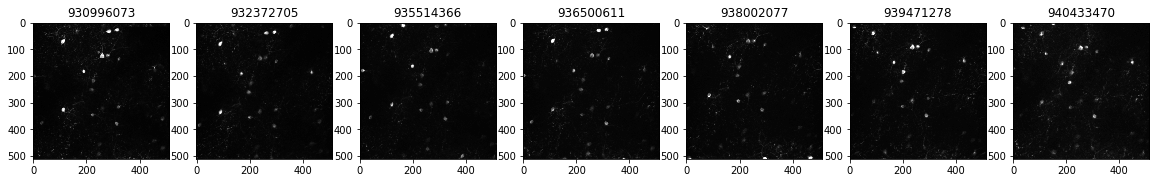

In [47]:
# ophys_experiment_ids are the index of the ophys_experiment_table
ophys_experiment_ids = container_experiments.index.values

# create figure axis
fig, ax = plt.subplots(1, len(ophys_experiment_ids), figsize=(20,5))
# enumerate over experiments in this container
for i, ophys_experiment_id in enumerate(ophys_experiment_ids): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get the max intensity projection and plot on the appropriate axis
    ax[i].imshow(dataset.max_projection.data, cmap='gray')
    ax[i].set_title(ophys_experiment_id)

### Get all imaging planes recorded during one session with novel images in a Vip mouse imaged on Multiscope

In [48]:
# get all Vip sessions in the Multiscope project code
vip_sessions = ophys_sessions[(ophys_sessions.cre_line=='Vip-IRES-Cre')&
                             (ophys_sessions.project_code=='VisualBehaviorMultiscope')&
                             (ophys_sessions.prior_exposures_to_image_set==0)]

# ophys_session_id is the index of the ophys_session_table
ophys_session_id = vip_sessions.index.values[0]

In [49]:
# look at info for this ophys session
vip_sessions.loc[ophys_session_id]

equipment_name                                                                MESO.1
full_genotype                          Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt
mouse_id                                                                      523922
reporter_line                                             Ai148(TIT2L-GC6f-ICL-tTA2)
driver_line                                                           [Vip-IRES-Cre]
sex                                                                                M
age_in_days                                                                      183
session_type                                                        OPHYS_4_images_B
cre_line                                                                Vip-IRES-Cre
indicator                                                                    GCaMP6f
session_number                                                                     4
prior_exposures_to_session_type                                  

### Plot the average dF/F trace for each of the experiments in this session for a 5 minute time period 

In [50]:
# get all the ophys_experiment_ids (corresponding to imaging planes) for this session
ophys_experiment_ids = vip_sessions.loc[ophys_session_id].ophys_experiment_id
print(ophys_experiment_ids)

[1050762966, 1050762969, 1050762972, 1050762974, 1050762975, 1050762977]


/Users/marinag/anaconda3/envs/visual_behavior_sdk/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/marinag/anaconda3/envs/visual_behavior_sdk/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


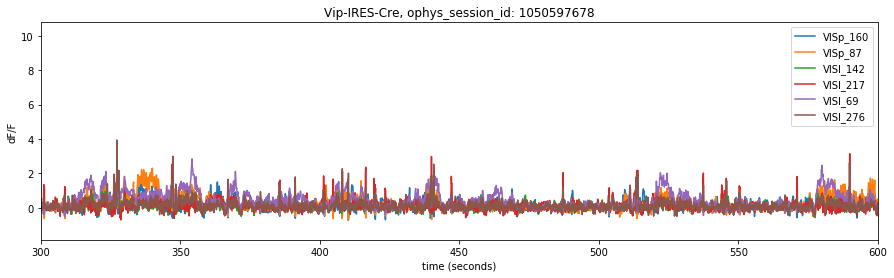

In [51]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiment_id in enumerate(ophys_experiment_ids): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    imaging_depth = dataset.metadata['imaging_depth']
    targeted_structure = dataset.metadata['targeted_structure']
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF, label=targeted_structure+'_'+str(imaging_depth))
    ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.legend()